In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 

# Load Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup (Datetime & 'job_skills' to list type)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# Converts 'job_skills' column to list type - Allows for .explode()
df['job_skills'] = (df['job_skills']
                .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)) 

# Filter for 'Data Analyst' jobs and jobs from the USA (also dropping NaN values)
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
# Explode out the job_skills column
df_DA_US = df_DA_US.explode('job_skills')

In [4]:
df_DA_US_grouped = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [5]:
# Top 10 highest paying skills
df_DA_US_top_pay = df_DA_US_grouped.sort_values(by='median', ascending=False).head(10)

# Skills with the highest count
df_DA_US_top_count = (df_DA_US_grouped
                      .sort_values(by='count', ascending=False).head(10) # Sort by count
                      .sort_values(by='median', ascending=False) # Sort the top 10 by median salary
                      )

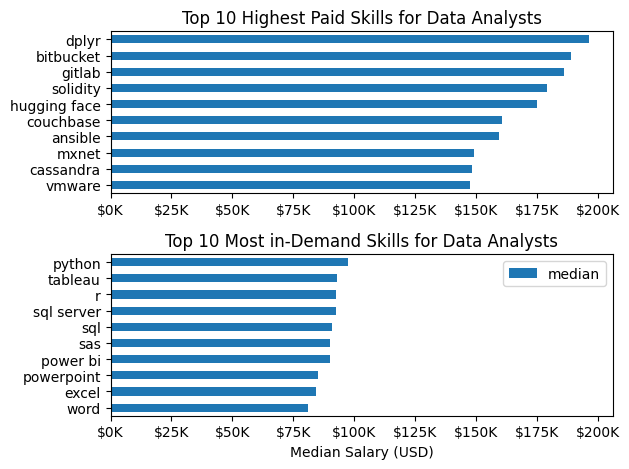

In [9]:
fig, ax = plt.subplots(2, 1)

# 1st subplot
df_DA_US_top_pay.plot(kind='barh', y = 'median', ax = ax[0], legend=False)
ax[0].invert_yaxis() # So that we get the highest salary at the top rather than the bottom
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# 2nd subplot
df_DA_US_top_count.plot(kind='barh', y = 'median', ax = ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Most in-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim()) # Helps us use the x axis from the top plot in the bottom
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()